# Question 4

In [1]:
import pandas as pd
gdp=pd.read_csv("/Users/yzh/Downloads/ddf--gapminder--systema_globalis-master/ddf--datapoints--alternative_gdp_per_capita_ppp_wb--by--geo--time.csv")
lifexp=pd.read_csv("/Users/yzh/Downloads/ddf--gapminder--systema_globalis-master/ddf--datapoints--life_expectancy_years--by--geo--time.csv")


# pair gdp per capita with life expectancy

In [35]:
tbl=gdp.merge(lifexp,on=["geo", "time"], how="left")
tbl=tbl.dropna()

# get correlation coefficent between gdp per capita and life expectancy grouped by time

In [43]:
corr=tbl.groupby("time")[["alternative_gdp_per_capita_ppp_wb", "life_expectancy_years"]].corr().iloc[0::2,-1]


In [69]:
corr

time                                   
1990  alternative_gdp_per_capita_ppp_wb    0.566610
1991  alternative_gdp_per_capita_ppp_wb    0.573678
1992  alternative_gdp_per_capita_ppp_wb    0.581162
1993  alternative_gdp_per_capita_ppp_wb    0.587612
1994  alternative_gdp_per_capita_ppp_wb    0.556197
1995  alternative_gdp_per_capita_ppp_wb    0.582940
1996  alternative_gdp_per_capita_ppp_wb    0.584590
1997  alternative_gdp_per_capita_ppp_wb    0.584598
1998  alternative_gdp_per_capita_ppp_wb    0.595092
1999  alternative_gdp_per_capita_ppp_wb    0.595526
2000  alternative_gdp_per_capita_ppp_wb    0.570316
2001  alternative_gdp_per_capita_ppp_wb    0.570606
2002  alternative_gdp_per_capita_ppp_wb    0.573337
2003  alternative_gdp_per_capita_ppp_wb    0.575660
2004  alternative_gdp_per_capita_ppp_wb    0.577918
2005  alternative_gdp_per_capita_ppp_wb    0.586091
2006  alternative_gdp_per_capita_ppp_wb    0.589090
2007  alternative_gdp_per_capita_ppp_wb    0.598745
2008  alternative_gdp_pe

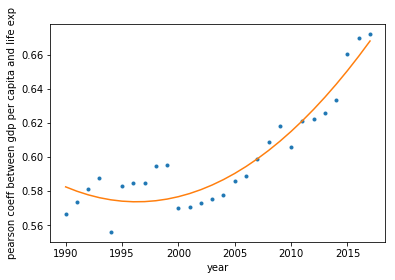

intercept:  877.1776894555435  coeff for x  -0.8782253551684462 coeff for x**2 0.0002199624639237885


In [78]:
import numpy as np
from numpy.polynomial.polynomial import polyfit
import matplotlib.pyplot as plt

#  data
x = np.array( corr.index.levels[0] )
y = np.array( corr )

# Fit with polyfit
b, m , n= polyfit(x, y, 2)

plt.plot(x, y, '.')
plt.plot(x, b + m * x + n*x*x, '-')
plt.xlabel("year")
plt.ylabel("pearson coeff between gdp per capita and life exp")
plt.show()
print("intercept: ", b, " coeff for x ", m, "coeff for x**2", n)

# Question 5, similarly as Q4

In [72]:
import pandas as pd
gdp=pd.read_csv("/Users/yzh/Downloads/ddf--gapminder--systema_globalis-master/ddf--datapoints--alternative_gdp_per_capita_ppp_wb--by--geo--time.csv")
mortality=pd.read_csv("/Users/yzh/Downloads/ddf--gapminder--systema_globalis-master/ddf--datapoints--newborn_mortality_rate_per_1000--by--geo--time.csv")


In [73]:
tbl=gdp.merge(mortality,on=["geo", "time"], how="left")
tbl=tbl.dropna()

In [80]:
corr=tbl.groupby("time")[["alternative_gdp_per_capita_ppp_wb",
                          "newborn_mortality_rate_per_1000"]].corr(
).iloc[0::2,-1]

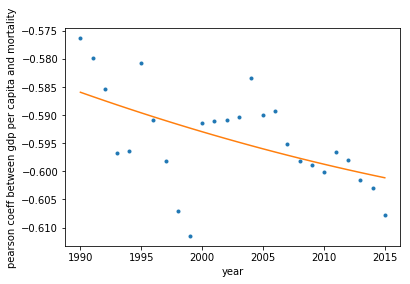

intercept:  25.78605340715258  coeff for x  -0.02573816001639469 coeff for x**2 6.274333334650346e-06


In [82]:
import numpy as np
from numpy.polynomial.polynomial import polyfit
import matplotlib.pyplot as plt

#  data
x = np.array( corr.index.levels[0] )
y = np.array( corr )

# Fit with polyfit
b, m , n= polyfit(x, y, 2)

plt.plot(x, y, '.')
plt.plot(x, b + m * x + n*x*x, '-')
plt.xlabel("year")
plt.ylabel("pearson coeff between gdp per capita and mortality")
plt.show()
print("intercept: ", b, " coeff for x ", m, "coeff for x**2", n)